In [9]:
import scipy.stats as stats
import numpy as np 
import matplotlib.pyplot as plt 

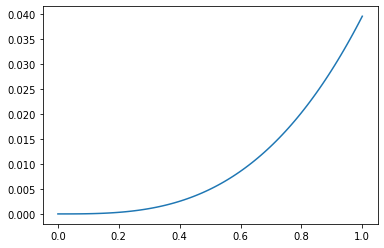

In [14]:
n_points = 100

p_grid = np.linspace(0, 1, n_points)

prior = np.ones(shape=n_points)

likelihood = stats.binom.pmf(3,3,p_grid)

unstd_posterior = likelihood * prior

posterior = unstd_posterior / unstd_posterior.sum()

plt.plot(p_grid, posterior)

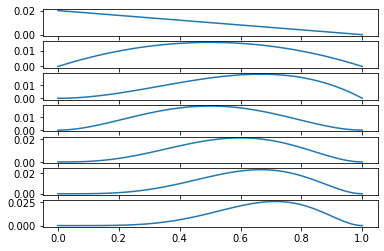

In [43]:
draws = [0, 1, 1, 0, 1, 1, 1]

n_points = 100

p_grid = np.linspace(0, 1, n_points)

posterior = np.ones(shape=n_points)


for n_draws, draw in enumerate(draws):
    prior = posterior

    likelihood = stats.binom.pmf(draw, 1, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    plt.subplot(len(draws), 1, n_draws + 1 )

    plt.plot(p_grid, posterior)


Text(0, 0.5, 'density')

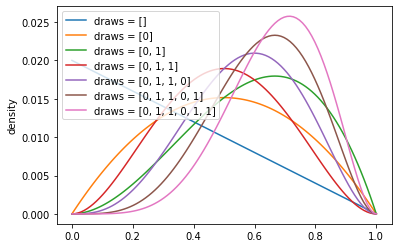

In [41]:
draws = [0, 1, 1, 0, 1, 1, 1]

n_points = 100

p_grid = np.linspace(0, 1, n_points)

posterior = np.ones(shape=n_points)


for n_draws, draw in enumerate(draws):
    prior = posterior

    likelihood = stats.binom.pmf(draw, 1, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    plt.plot(p_grid, posterior, label = f"draws = {draws[:n_draws]}")
plt.legend()
plt.ylabel("density")

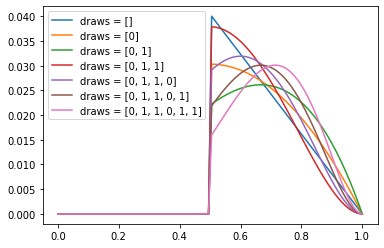

In [44]:
draws = [0, 1, 1, 0, 1, 1, 1]

n_points = 100

p_grid = np.linspace(0, 1, n_points)

prior = np.where(p_grid < 0.5, 0, 1)
posterior = prior

for n_draws, draw in enumerate(draws):
    prior = posterior

    likelihood = stats.binom.pmf(draw, 1, p_grid)

    unstd_posterior = likelihood * prior

    posterior = unstd_posterior / unstd_posterior.sum()

    # plt.subplot(len(draws), 1, n_draws )

    plt.plot(p_grid, posterior, label = f"draws = {draws[:n_draws]}")
plt.legend()

In [45]:
n_points = 2

p_grid = np.arange(2) # boolean is_earth?

# (Pr(Earth|land)) = Pr(land | earth) * Pr(earth)
prior = np.ones(shape=2)

likelihood = np.array([1, .3])

unstd_posterior = prior * likelihood

posterior = unstd_posterior / unstd_posterior.sum()

posterior

array([0.76923077, 0.23076923])

In [46]:
# 6 ways to put down card. 3 ways with black side faced up. 2 of those from card with black on both sides

In [ ]:
# 8 ways to put down card. 5 ways with black side faced up. 4 of those from card with black on both sides

In [ ]:
# 6 ways to put down card. 3 ways with black side faced up. 2 of those from card with black on both sides. 1 way from 
# b/w but that one counts double compared to b/b hence 2 and 2 ways which leads to 50 %

In [ ]:

# so b/b -> b/w = 2 * 1 ways. 
# b/b -> w/w = 2 * 2 ways. 
# b/w -> w/w = 1 * 2 ways.
# w/w -/->

# only in 6 out of 8 cases would other side first card be black

In [72]:
n_points = 2
p_grid = np.arange(2) # is B



# Pr(species | offspring is twins ) = Pr( offspring is twins | species ) * Pr(species)
pr_offspring_twins_given_species = np.array([0.1, 0.2])
unstd_posterior_1 = pr_offspring_twins_given_species * np.ones_like(p_grid)
species_prior = unstd_posterior_1 / unstd_posterior_1.sum()
# This becomes the prior Pr(species)

# Pr(offspring twins) = sum_{species_i} Pr(offspring twins | species_i) *  Pr(species_i) 
pr_twins = pr_offspring_twins_given_species * species_prior
pr_twins.sum()

0.16666666666666666

In [73]:
species_prior[0]

0.3333333333333333

In [75]:
# Pr(species | second birth = single, first birth = twins) = 
# Pr(second birth = single | species) * Pr(species | first birth = twins)

unstd_posterior = (1 - pr_offspring_twins_given_species)  * species_prior

posterior = unstd_posterior / unstd_posterior.sum()

posterior[0] 


0.36000000000000004

In [80]:
# Alternatively 
 
dens_species_A = stats.binom.pmf(1,2, 0.1) 
dens_species_B = stats.binom.pmf(1,2, 0.2)

dens_species_A / (dens_species_A + dens_species_B)


0.3600000000000001

In [85]:
# Pr(test identifies A | species is A) = 0.8, Pr(test identifies B | species is A) = 0.2,
# Pr(test identifies B | species is B) = 0.65, Pr(test identifies A | species is B) = 0.35,

# Pr(species is A | test identifies A) = Pr( test identifies A | species is A)*Pr(species is A)/Pr(test identifies A)

# Pr(test identifies A) = sum_{species_i} Pr(test identifies A | species is species_i) * Pr(species is species_i) = 
# = 0.8 * 0.5 + 0.35 * 0.5 

# Pr(species is A | test identifies A) =
0.8 * 0.5 / (0.8 * 0.5 + 0.35 * 0.5) 



0.6956521739130436

In [86]:
# when using previous information: Pr(species is A) is not 1/2, but it's 0.36, so
Pr_species_A = 0.36
0.8 * Pr_species_A / (0.8 * Pr_species_A + 0.35 * (1-Pr_species_A)) 

0.5625